<div style="height: 150px; line-height: 150px; width:75%; float: left; font-size: 40px;">Netflix Contents Exploratory Data Analysis</div>
<div style="text-align: right; width:25%; float:right;">
    <img 
         src="https://imgix.bustle.com/uploads/image/2017/8/29/c8c8077a-10fc-44d5-93f0-da4e592a299e-netflix-logo-print_pms.jpg?w=800&fit=crop&crop=faces&auto=format%2Ccompress"
         style="width: 275px; height: 150px;"
     >
</div>

<font size="3">Netflix, Inc. is an American subscription streaming service and production company based in Los Gatos, California. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2022, Netflix had over 221.6 million subscribers worldwide. <a href="https://en.wikipedia.org/wiki/Netflix">Wikipedia</a></font>

## Introduction
<font size="3">This notebook contains the exploratory data analysis of the <a href="https://www.kaggle.com/datasets/shivamb/netflix-shows">Netflix Movies and TV Shows dataset</a>. The dataset contains a comprehensive list of the movies and TV shows available for streaming on the platform. Each row contains the show ID, category, title, director(s), cast, country, release date, rating, duration, genre(s) and description of a movie/TV show.</font>

<font size="3">The EDA process will consist of several stages. The dataset will first be cleaned and other neccessary changes will be made before insights can be made through analysis and presented using visualisation.</font>

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from IPython.display import Image

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

## Import Data

In [2]:
df = pd.read_csv('data/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Overview

In [3]:
# Size of the Dataset
print(f"Number of rows (movies & TV shows): {df.shape[0]}")
print(f"Number of columns (attributes): {df.shape[1]}")

Number of rows (movies & TV shows): 7789
Number of columns (attributes): 11


In [4]:
# Column data types
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

## Data Manipulation

In [5]:
# Correcting the only incorrect data type
df["Release_Date"] = pd.to_datetime(df["Release_Date"])

In [6]:
# Rename "Type" column to "Genre"
df = df.rename(columns={"Type":"Genre"})

In [7]:
# Add column with total cast member count
def calculate_cast_count(x):
    if str(x) == 'nan':
        return np.nan
    else:
        return x.count(',') + 1

df["Cast Count"] = df["Cast"].apply(lambda x: calculate_cast_count(x))

In [8]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12.0


## Data Cleaning 
<font size="3">Before any insights are drawn from the data, the data will first be cleaned to make sure these insights are accurate.</font>

<font size="3">This data cleaning will be in the form of:</font>
- Finding and handling duplicate data
- Finding and handling null values
- Finding and handling outliers (not neccessary due to all fields being non-numerical)

### Finding and handling duplicate data

In [9]:
# Count the number of duplicate rows, in which all columns are identical to anothers
df.duplicated().sum()

2

In [10]:
# Look for duplicate rows
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,6.0
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,10.0


In [11]:
# Verify that these rows are infact duplicates
df[(df["Show_Id"] == "s684") | (df["Show_Id"] == 's6621')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
683,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,6.0
4839,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,10.0
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,6.0
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,10.0


In [12]:
# Remove those duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Verify that the duplicates have been removed
print(df.duplicated().sum())
df[(df["Show_Id"] == "s684") | (df["Show_Id"] == 's6621')]

0


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
683,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,6.0
4839,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,10.0


### Finding and handling null values

In [14]:
# Calculate percentage of null values in each column
print("Column Name | Total NULLs | Percent NULL")
for i in df.columns:
    total_null = df[i].isna().sum()
    pct_null = round(df[i].isna().sum() * 100 / len(df[i]), 2)
    print(f"{i} - {total_null} - {pct_null}%")

Column Name | Total NULLs | Percent NULL
Show_Id - 0 - 0.0%
Category - 0 - 0.0%
Title - 0 - 0.0%
Director - 2388 - 30.67%
Cast - 718 - 9.22%
Country - 507 - 6.51%
Release_Date - 10 - 0.13%
Rating - 7 - 0.09%
Duration - 0 - 0.0%
Genre - 0 - 0.0%
Description - 0 - 0.0%
Cast Count - 718 - 9.22%


<font size="3">There is no need to remove any rows or columns since there are no rows in which all values are null and there is not a significant enough ratio of null values in any column.</font>

## Exploratory Data Analysis

<font size="3">Popular python libraries inluding Pandas, Matplotlib, Seaborn and Plotly will be used to draw insights and create visualisations from the imported Netflix dataset.</font>

### Looking at 'Category'
<font size="3">The 'Category' field categorises Netflix content into two self-explanatory categories: Movies and TV Shows.</font>

#### What is the split of movies to TV shows on Netflix?

In [15]:
# Number of titles for each category
category_titles = df.groupby('Category')["Show_Id"].count().reset_index()
category_titles

,Category,Show_Id
0,Movie,5377
1,TV Show,2410


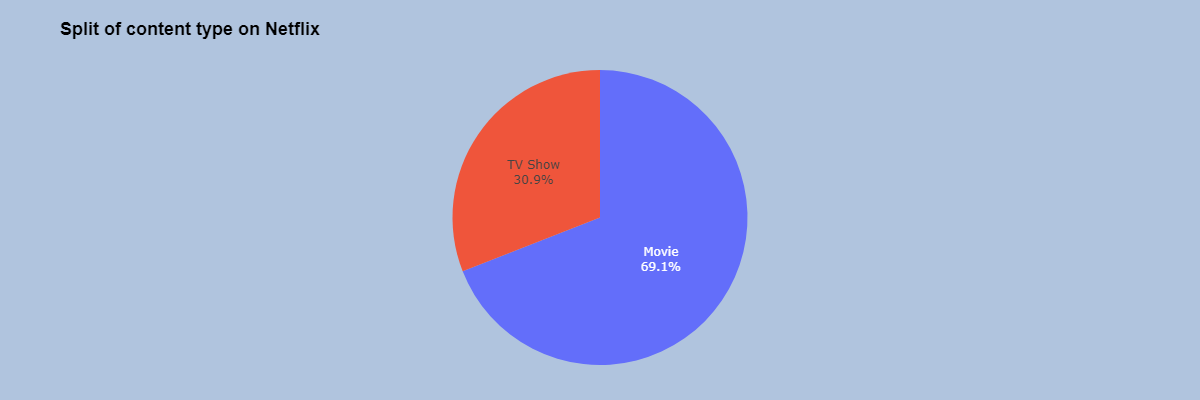

In [16]:
fig = px.pie(category_titles, values="Show_Id", names="Category", title="<b>Split of content type on Netflix<b>")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(t=70, b=35, l=0, r=0),
    titlefont=dict(size=18, color='black', family='Arial, sans-serif'),
    paper_bgcolor="LightSteelBlue",
    showlegend=False,
    autosize=False,
    width=1200, 
    height=400
)
fig.write_image("figures/TitlesByCategoryPie.png")

Image(filename="figures/TitlesByCategoryPie.png")

<font size="3">With 69.1% of the titles on Netflix being movies, it is clear that there are significantly more movies available than tv shows. This surpasses a ratio of 2:1 for movies to TV shows.</font>

### Looking at 'Release_Date'
<font size="3">The 'Release_Date' field contains the date the content was added onto Netflix, spanning from the inception to the streaming platform to the most recent release.</font>

#### What was the first piece of content released onto Netflix?

In [17]:
df[df["Release_Date"] == df["Release_Date"].min()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",6.0


<font size="3">The movie titled 'To and From New York' was the first piece of content Netflix released onto their streaming platform on the 1st of January 2008.</font>

#### How has the amount of content being released onto Netflix changed over time?

In [18]:
# Count the cumulative number of releases over time
cumulative_releases_df = df.groupby('Release_Date')["Release_Date"].count().cumsum().reset_index(name="Count")
cumulative_releases_df

,Release_Date,Count
0,2008-01-01,1
1,2008-02-04,2
2,2009-05-05,3
3,2009-11-18,4
4,2010-11-01,5
...,...,...
1507,2021-01-12,7755
1508,2021-01-13,7757
1509,2021-01-14,7759
1510,2021-01-15,7774


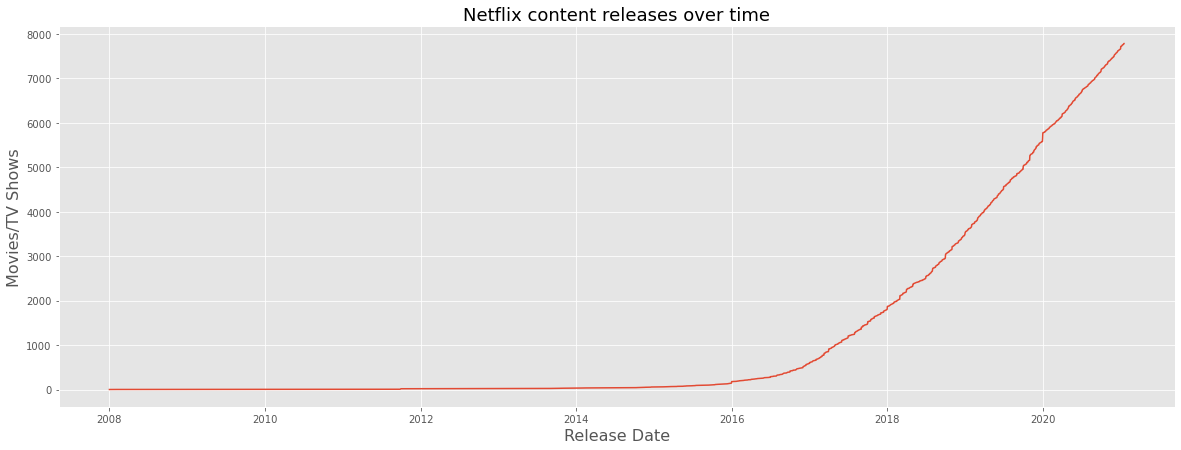

In [19]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=cumulative_releases_df, x="Release_Date", y="Count")
plt.title("Netflix content releases over time", size=18)
plt.xlabel("Release Date", size=16)
plt.ylabel("Movies/TV Shows", size=16)
plt.show()

<font size="3">Most of the movies and TV shows available on Netflix have been released in recent years and there is seemingly an effort to release more and more content onto the platform each year.</font>

#### How are content releases on Netflix distributed throughout the month?

In [20]:
# Group total releases by day of the month
sorted_df = df.groupby(df["Release_Date"].dt.day)["Release_Date"].count().reset_index(name="Count")
sorted_df.head()

,Release_Date,Count
0,1.0,2069
1,2.0,247
2,3.0,127
3,4.0,151
4,5.0,207


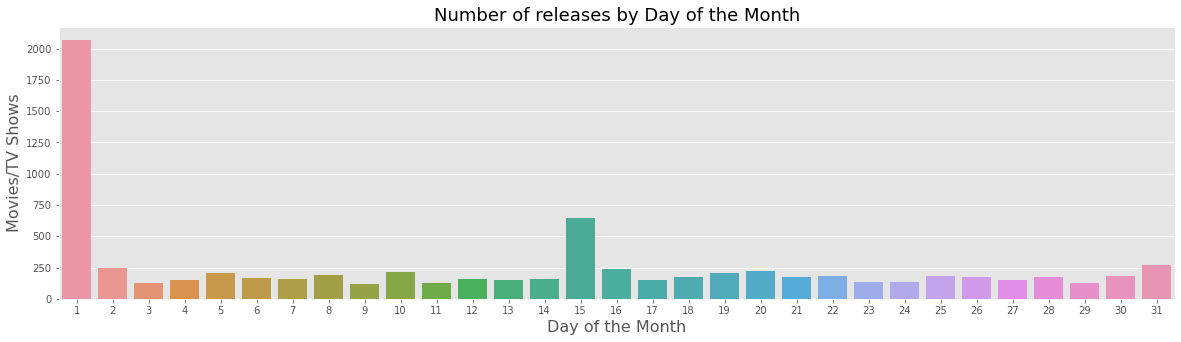

In [21]:
plt.figure(figsize=(20, 5))
sns.barplot(data=sorted_df, x=sorted_df["Release_Date"].astype('int8'), y="Count")
plt.title("Number of releases by Day of the Month", size=18)
plt.xlabel("Day of the Month", size=16)
plt.ylabel("Movies/TV Shows", size=16)
plt.show()

<font size="3">A disproportionate amount of movies and TV shows are released on the first day of each month and it is clear that it is Netflix's intention. The same is true when looking at the 15th day of each month, but this is to a lesser extent.</font>

#### How does the total number of movies and TV shows released each year compare?

In [22]:
# Count total yearly releases for each category
releases_by_year = df.groupby(["Category", df["Release_Date"].dt.year])["Show_Id"].count().reset_index(name="Releases")
releases_by_year["Release_Date"] = releases_by_year["Release_Date"].astype('int32')
releases_by_year.head(5)

,Category,Release_Date,Releases
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3


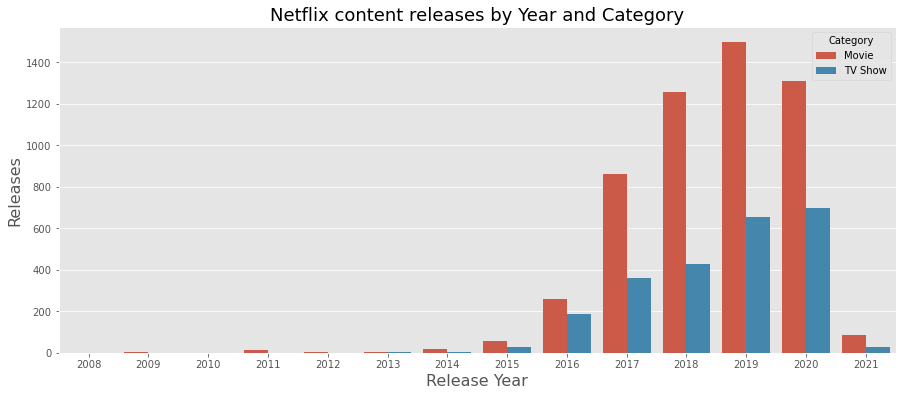

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Release_Date", y="Releases", hue="Category", data=releases_by_year)
plt.title("Netflix content releases by Year and Category", size=18)
plt.xlabel("Release Year", size=16)
plt.ylabel("Releases", size=16)
plt.show()

<font size="3">It is evident that Netflix consistently releases a significantly higher number of movies than TV shows. Irregardless of category there is an increase in the amount of content being released onto the streaming platform each year.</font>

### Looking at 'Country'
<font size="3">The 'Country' field contains a list of the countries in which the production of the movie/TV show took place.</font>

#### How many productions has each country participated in?

In [24]:
full_country_list = df.copy()

full_country_list["Country"] = full_country_list["Country"].str.split(', ')
full_country_list = full_country_list.explode('Country')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12.0


In [25]:
# Count total number of movies/TV shows for each country
titles_by_country = full_country_list.groupby('Country')["Show_Id"].count().reset_index(name="Count").sort_values('Count', ascending=False)
titles_by_country

,Country,Count
113,United States,3296
43,India,990
111,United Kingdom,722
19,Canada,412
34,France,349
...,...,...
53,Kazakhstan,1
50,Jamaica,1
93,Slovakia,1
95,Somalia,1


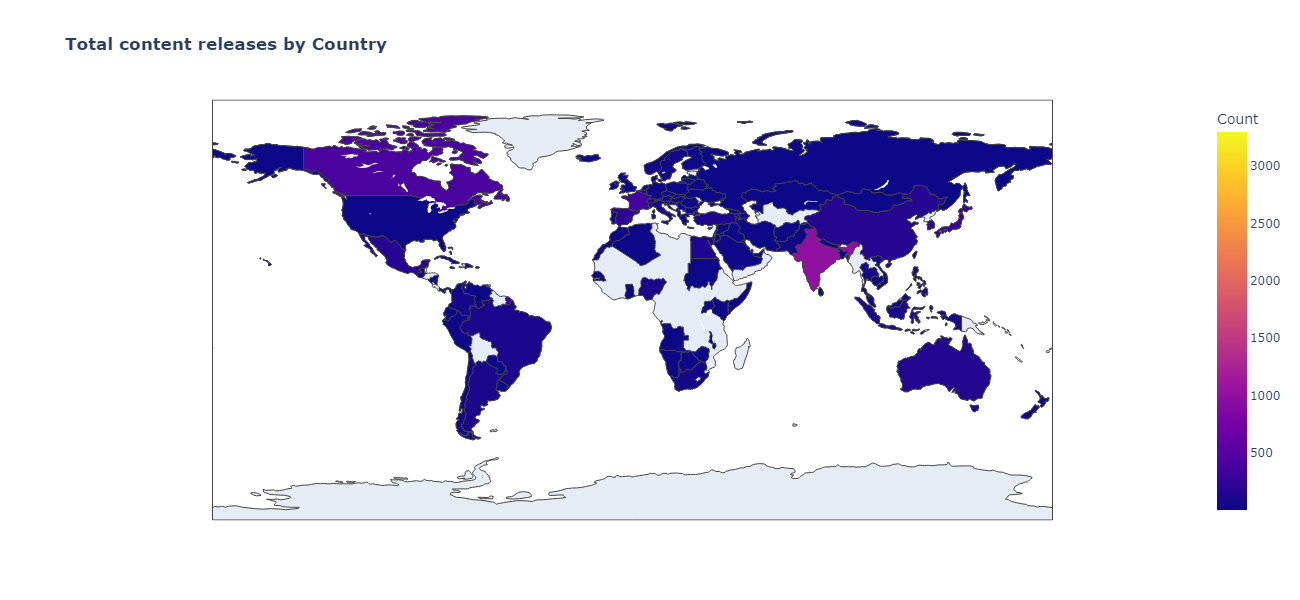

In [26]:
fig = px.choropleth(
    data_frame=titles_by_country, 
    locations="Country", 
    locationmode="country names",
    color="Count", 
    title="<b>Total content releases by Country</b>",
    width=1300,
    height=600
)
fig.write_image("figures/ReleasesByCountry.png")

Image(filename="figures/ReleasesByCountry.png")

<font size="3">It is clear that, by a significant margin, the United States has produced the most movies and TV shows available on Netflix. The extent of this dominance is visible in the above choropleth, which shows the United States has output 3x the amount of content produced by the runner up India.</font>

#### How do the top producing countries compare for movies and TV shows?

In [27]:
# Count number of releases for each country grouped by category
category_country_releases = full_country_list.groupby(["Category", 'Country'])["Show_Id"].count().reset_index(name="Releases")

# Combine list of categorised releases with total country releases
category_country_releases = pd.merge(left=titles_by_country, right=category_country_releases, on="Country", how="inner")

In [28]:
# Rank total number of releases for each country
category_country_releases["rank"] = category_country_releases["Count"].rank(method="dense", ascending=False)

# Filter to only include top 5 producing countries
category_country_releases = category_country_releases[category_country_releases["rank"] <= 5]
category_country_releases

,Country,Count,Category,Releases,rank
0,United States,3296,Movie,2430,1.0
1,United States,3296,TV Show,866,1.0
2,India,990,Movie,915,2.0
3,India,990,TV Show,75,2.0
4,United Kingdom,722,Movie,466,3.0
5,United Kingdom,722,TV Show,256,3.0
6,Canada,412,Movie,286,4.0
7,Canada,412,TV Show,126,4.0
8,France,349,Movie,265,5.0
9,France,349,TV Show,84,5.0


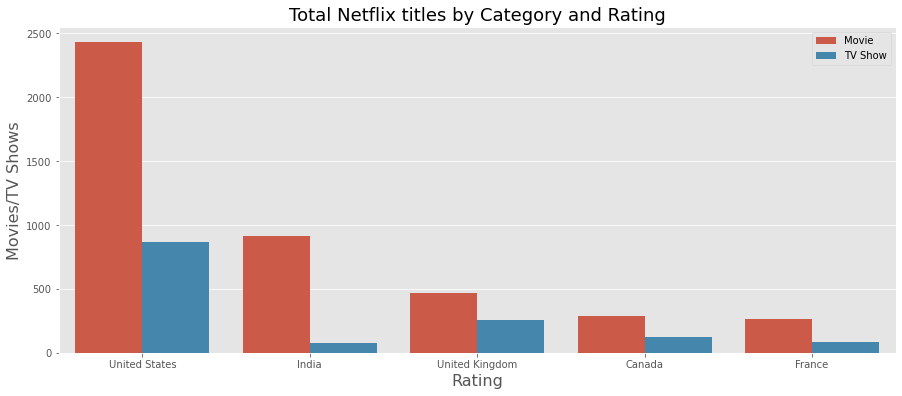

In [29]:
plt.figure(figsize=(15, 6))
sns.barplot(data=category_country_releases, x="Country", y="Releases", hue="Category")
plt.title("Total Netflix titles by Category and Rating", size=18)
plt.xlabel("Rating", size=16)
plt.ylabel("Movies/TV Shows", size=16)
plt.legend(loc='upper right')
plt.show()

<font size="3">It is clear that netflix picks up different types of content from different countries. For example, nearly all available South Korean titles are TV shows, whereas nearly all Indian titles are movies. Whether this is a conscious decision made by Netflix or due to different countries focusing on producing one form of content over the other is unclear.</font>

### Looking at 'Rating'
<font size="3">The 'Rating' field contains the content rating that has been assigned to the movie/TV show.</font>

#### What are all the unique ratings assigned to the content available on Netflix?

In [30]:
# Only include content with a listed rating
ratings_df = df[df["Rating"].notna()]

In [31]:
print("All ratings:")
print(*(i for i in ratings_df["Rating"].unique()), sep=', ', end='')

All ratings:
TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y, TV-Y7, PG, G, NC-17, TV-Y7-FV, UR

#### How do the ratings given to movies and TV shows compare?

In [32]:
# Group total number of movies/TV shows by their category and rating 
category_rating_count = df.groupby(["Category", "Rating"])["Show_Id"].count().reset_index(name="Count")
category_rating_count.head()

,Category,Rating,Count
0,Movie,G,39
1,Movie,NC-17,3
2,Movie,NR,79
3,Movie,PG,247
4,Movie,PG-13,386


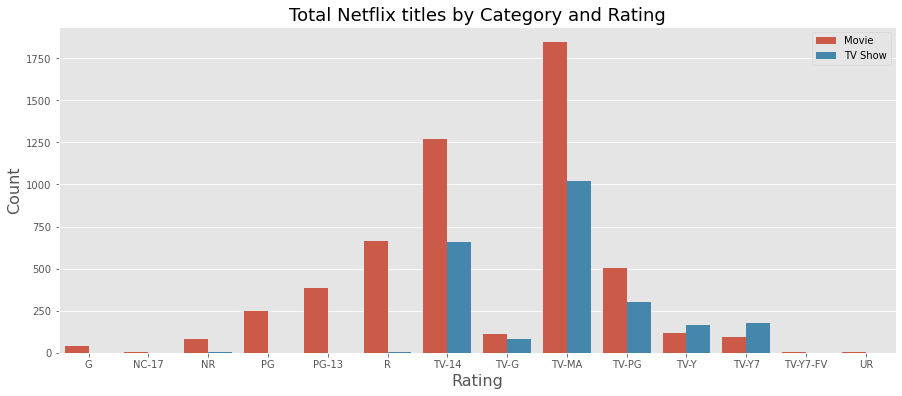

In [33]:
plt.figure(figsize=(15, 6))
sns.barplot(data=category_rating_count, x="Rating", y="Count", hue="Category")
plt.title("Total Netflix titles by Category and Rating", size=18)
plt.xlabel("Rating", size=16)
plt.ylabel("Count", size=16)
plt.legend(loc='upper right')
plt.show()

<font size="3">From the above barchart it is apparent that the most commonly assigned content rating is 'TV-MA', and this is true for both movies and TV shows. Some ratings are unique to the form of content eg. 'PG', 'PG-13' and 'R' are only assigned to movies. There are several other ratings but these appear much less frequently.</font>

### Looking at 'Duration'
<font size="3">The 'Duration' field contains the length of the content. This is different depending on the 'Category' as for movies the duration is measured in minutes and for TV shows the duration is measured in seasons.</font> 

#### What is the average movie duration?

In [34]:
# Create new dataframe containing only moviers
movie_df = df[df["Category"] == "Movie"]

# Gather movie length for all movies
movie_df["Duration"] = movie_df["Duration"].str.replace(' min', '')
movie_df["Duration"] = pd.to_numeric(movie_df["Duration"])
movie_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123,Dramas,A brilliant group of students become card-coun...,12.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",8.0


In [35]:
# Average movie duration
movie_df["Duration"].mean()

99.30797842663195

#### How is the duration of movies distributed?

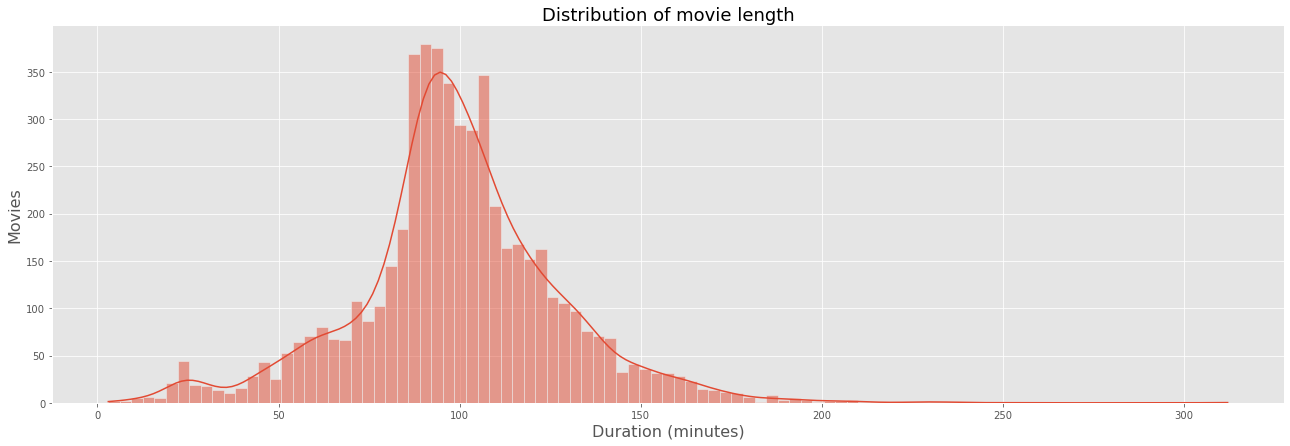

In [36]:
sns.displot(data=movie_df, x="Duration", kde=True, height=6, aspect=3)
plt.title("Distribution of movie length", size=18)
plt.xlabel("Duration (minutes)", size=16)
plt.ylabel("Movies", size=16)
plt.xticks=np.arange(0, math.ceil(movie_df["Duration"].max() / 10.0) * 10, 10)
plt.show()

<font size="3">The distribution plot shows that the majority of movies available on Netflix have a duration between 85 and 110 minutes, with the most common run time being around 90 minutes.</font>

### Looking at 'Cast'
<font size="3">The 'Cast' field contains a list of the notable actors and actresses which acted in the movie/TV show.</font>

#### How does the average number of cast members compare for movies and TV shows?

In [37]:
# Average number of cast members for each category
df.groupby('Category')["Cast Count"].mean()

Category
Movie      7.738235
TV Show    8.330028
Name: Cast Count, dtype: float64

#### How many unique cast members have starred in the content available on Netflix?

In [38]:
# Only include content where a cast is listed
cast_df = df[df["Cast"].notna()]

# Create list consisting of all cast members for each title
cast_df["Cast List"] = cast_df["Cast"].str.split(', ')
cast_df = cast_df.explode('Cast List')
cast_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count,Cast List
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,João Miguel
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,Bianca Comparato
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,Michel Gomes
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,Rodolfo Valente
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,Vaneza Oliveira


In [39]:
cast_df["Cast List"].nunique()

32881

<font size="3">A total of 32881 unique actors and actresses have acted in the movies and TV shows available on Netflix.</font>

### Looking at 'Director'
<font size="3">The 'Director' field contains a list of the directors which took part in directing the movie/TV show.</font>

#### How many unique directors have directed the content available on Netflix?

In [40]:
directors_df = df[df["Director"].notna()]

# Split director lists on individual content to create full director list
directors_df["Director List"] = directors_df["Director"].str.split(', ')
directors_df = directors_df.explode('Director List')
directors_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count,Director List
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0,Jorge Michel Grau
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0,Gilbert Chan
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0,Shane Acker
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12.0,Robert Luketic
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,10.0,Serdar Akar


In [41]:
directors_df["Director List"].nunique()

4482

<font size="3">A total of 4482 unique directors have participated in directing the movies and TV shows available on Netflix.</font>

#### Which directors have directed the most content available on Netflix?

In [42]:
# Count number of instances for each director
full_directors_count = directors_df.groupby('Director List')["Director List"].count().reset_index(name="Count").sort_values('Count', ascending=False).head(5)
full_directors_count

,Director List,Count
1722,Jan Suter,21
3411,Raúl Campos,19
2581,Marcus Raboy,16
1765,Jay Karas,15
688,Cathy Garcia-Molina,13


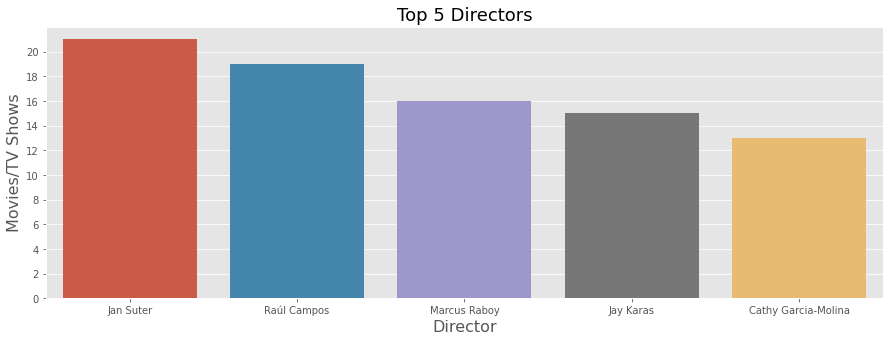

In [43]:
plt.figure(figsize=(15, 5))
a = sns.barplot(data=full_directors_count, x="Director List", y="Count")
a.set(yticks=range(0, full_directors_count["Count"].max()+1, 2))
a.set_title("Top 5 Directors", size=18)
a.set_xlabel("Director", size=16)
a.set_ylabel("Movies/TV Shows", size=16)

plt.show()

<font size="3">With a total of 21 movies/TV shows Jan Suter has participated in directing the most titles available on Netflix. This is closely followed by Raul Campos, Marcus Raboy, Jay Karas and Cathy Garcia-Molina respectively.</font>

### Looking at 'Genre'
<font size="3">The 'Genre' field contains a list of genres which best describe the movie/TV show.</font>

#### What are all the genres available for movies and TV shows on Netflix?

In [44]:
genre_df = df.copy()

# Split genre lists on individual content to create full genre list
genre_df["Genre List"] = genre_df["Genre"].str.split(', ')
full_genres = genre_df.explode('Genre List')

In [45]:
# Total unique genres
full_genres["Genre List"].nunique()

42

In [46]:
# List of unique movie genres
movie_genres = full_genres[full_genres["Category"] == "Movie"]["Genre List"].unique()
# List of unique TV show genres
tv_genres = full_genres[full_genres["Category"] == "TV Show"]["Genre List"].unique()

In [47]:
print(f"Movie Genres ({len(movie_genres)}):")
print(*(i for i in movie_genres), sep=', ', end='\n\n')

print(f"TV Show Genres ({len(tv_genres)}):")
print(*(i for i in tv_genres), sep=', ', end='')

Movie Genres (20):
Dramas, International Movies, Horror Movies, Action & Adventure, Independent Movies, Sci-Fi & Fantasy, Thrillers, Documentaries, Sports Movies, Comedies, Romantic Movies, Movies, Music & Musicals, LGBTQ Movies, Faith & Spirituality, Children & Family Movies, Classic Movies, Cult Movies, Stand-Up Comedy, Anime Features

TV Show Genres (22):
International TV Shows, TV Dramas, TV Sci-Fi & Fantasy, TV Mysteries, Crime TV Shows, Docuseries, Anime Series, Reality TV, TV Comedies, Romantic TV Shows, Science & Nature TV, British TV Shows, Korean TV Shows, Kids' TV, TV Action & Adventure, Spanish-Language TV Shows, TV Shows, TV Horror, Stand-Up Comedy & Talk Shows, Teen TV Shows, TV Thrillers, Classic & Cult TV

<font size="3">There are 42 unique genres which describe the content available on Netflix, 20 for movies and 22 for TV shows. It is clear Netflix categorises genres differently depending on whether the content is a movie or TV show.</font>

#### How do the most popular genres for movies and TV shows compare?

In [48]:
top_genres_df = df.copy()

top_genres_df["Genre List"] = top_genres_df["Genre"].str.split(', ')
top_genres_df = top_genres_df.explode('Genre List')
top_genres_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Genre,Description,Cast Count,Genre List
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,International TV Shows
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,TV Dramas
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0,TV Sci-Fi & Fantasy
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0,Dramas
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0,International Movies


In [49]:
# Calculate total number of movies/TV shows for each category & genre
top_genres_df = top_genres_df.groupby(["Category", "Genre List"])["Genre List"].count().reset_index(name="Count").sort_values('Count', ascending=False)
top_genres_df.head()

,Category,Genre List,Count
11,Movie,International Movies,2437
7,Movie,Dramas,2106
4,Movie,Comedies,1471
25,TV Show,International TV Shows,1199
6,Movie,Documentaries,786


In [50]:
# Rank genre grouped movies/TV shows by their total occurences 
top_genres_df["rank"] = top_genres_df.groupby(["Category"])["Count"].rank(method="dense", ascending=False)

In [51]:
# Filter to only include the 5 most frequent genres for each category
top_genres_df = top_genres_df[top_genres_df["rank"] <= 5].sort_values('rank')
top_genres_df

,Category,Genre List,Count,rank
11,Movie,International Movies,2437,1.0
25,TV Show,International TV Shows,1199,1.0
7,Movie,Dramas,2106,2.0
35,TV Show,TV Dramas,704,2.0
4,Movie,Comedies,1471,3.0
34,TV Show,TV Comedies,525,3.0
6,Movie,Documentaries,786,4.0
23,TV Show,Crime TV Shows,427,4.0
0,Movie,Action & Adventure,721,5.0
26,TV Show,Kids' TV,414,5.0


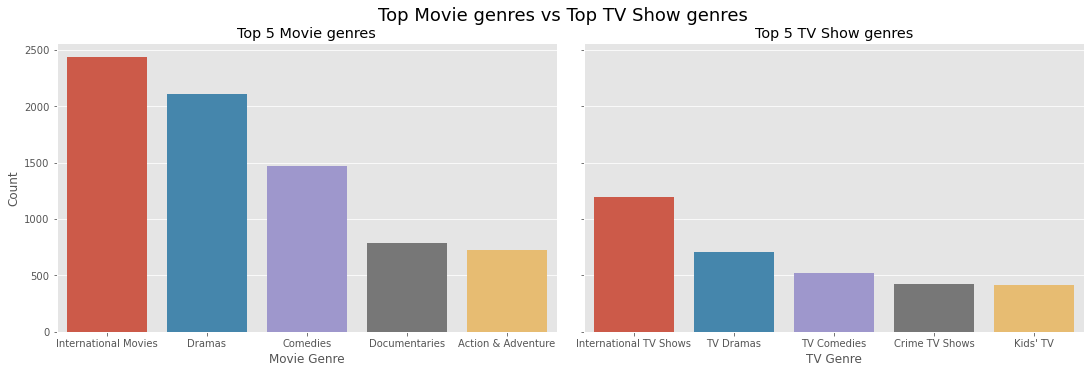

In [52]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.suptitle('Top Movie genres vs Top TV Show genres', size=18)
fig.tight_layout()

a = sns.barplot(ax=axes[0], data=top_genres_df[top_genres_df["Category"] == "Movie"], x="Genre List", y="Count")
a.set(title="Top 5 Movie genres", xlabel='Movie Genre')

b = sns.barplot(ax=axes[1], data=top_genres_df[top_genres_df["Category"] == "TV Show"], x="Genre List", y="Count")
b.set(title="Top 5 TV Show genres", ylabel='', xlabel='TV Genre')

plt.show()

<font size="3">There is a clear similarity between the most common movie and TV show genres with 'International Movies', 'Dramas' and 'Comedies' being the top 3 movie genres and 'International TV Shows', 'TV Dramas' and 'TV Comedies' being the top 3 TV show genres. After this there are some differences, probably due to different genres being better suited to different content formats.</font>